<h1><center><font color='green'><h1>Customer Analysis For Retail<h1></font></center></h1>

## Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

## Import the data set

In [3]:
customer = pd.read_csv("Customer.csv")
prod_info = pd.read_csv("prod_cat_info.csv")
transaction = pd.read_csv("Transactions.csv")

## Exploratory Data Analysis

In [3]:
customer.shape

(5647, 4)

In [4]:
prod_info.shape

(23, 4)

In [5]:
transaction.shape

(23053, 10)

In [6]:
customer.head(3)

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0


In [5]:
prod_info.head(3)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids


In [8]:
transaction.head(3)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [6]:
#renaming column
prod_info.rename(columns={"prod_sub_cat_code":"prod_subcat_code"},inplace=True)

In [7]:
prod_info.head(3)

,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids


## 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final

In [8]:
#Merge 'transaction' and 'prod_info' tables
prod_concat = pd.merge(left=transaction, right=prod_info,on=["prod_cat_code","prod_subcat_code"],how="left")

In [9]:
prod_concat.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY


In [10]:
prod_concat.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
dtype: int64

In [11]:
#Merge 'customer' and 'prod_concat' tables
customer_final = pd.merge(left=prod_concat, right=customer,right_on="customer_Id", left_on="cust_id", how="left")

In [12]:
transaction.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type'],
      dtype='object')

In [13]:
customer.columns

Index(['customer_Id', 'DOB', 'Gender', 'city_code'], dtype='object')

In [14]:
customer_final.head(3)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0


In [15]:
customer_final.isna().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
customer_Id         0
DOB                 0
Gender              9
city_code           8
dtype: int64

In [18]:
customer_final.dropna(inplace=True)

In [19]:
customer_final.isna().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
customer_Id         0
DOB                 0
Gender              0
city_code           0
dtype: int64

In [20]:
customer_final.shape

(23036, 16)

In [21]:
transaction.shape


(23053, 10)

In [23]:
# converting "DOB" and "tran_date" from object dtype to dates
customer_final["DOB"] = pd.to_datetime(customer_final["DOB"], format="%d-%m-%Y")
customer_final['DOB'].head(10)


0   1981-09-26
1   1973-05-11
2   1992-07-27
3   1981-06-08
4   1992-07-27
5   1982-10-09
6   1981-05-29
7   1971-04-21
8   1971-11-04
9   1979-11-27
Name: DOB, dtype: datetime64[ns]

In [24]:
customer_final["tran_date"] = pd.to_datetime(customer_final["tran_date"],format="%d-%m-%Y",errors='coerce')

In [25]:
customer_final["tran_date"].head(3)

0   2014-02-28
1   2014-02-27
2   2014-02-24
Name: tran_date, dtype: datetime64[ns]

In [26]:
#Checking for duplicate values
customer_final.duplicated().sum()

38

In [27]:
# dropping duplicate rows
customer_final.drop_duplicates(inplace=True)

In [28]:
#Checking for duplicate values
customer_final.duplicated().sum()

0

## 2. Prepare a summary report for the merged data set.

#### (a) Get the column names and their corresponding data types


In [29]:
#column names of "customer_final" dataframe

customer_final.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'prod_cat', 'prod_subcat', 'customer_Id', 'DOB', 'Gender', 'city_code'],
      dtype='object')

In [30]:
# data types of all columns of "customer_final" dataframe
customer_final.dtypes

transaction_id               int64
cust_id                      int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
prod_cat                    object
prod_subcat                 object
customer_Id                  int64
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
dtype: object

#### (b) Top/Bottom 10 observations

In [32]:
# top 10 observations
customer_final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
5,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,Personal Appliances,272357,1982-10-09,F,6.0
6,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,Bath,273667,1981-05-29,M,9.0
7,22643667930,271489,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,Tools,271489,1971-04-21,M,9.0
8,79792372943,275108,2014-02-22,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,Kids,275108,1971-11-04,F,8.0
9,50076728598,269014,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,Personal Appliances,269014,1979-11-27,F,3.0


In [33]:
#bottom 10 observations
customer_final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
23043,49882891062,271982,2011-01-25,10,5,4,1330,558.600,5878.600,e-Shop,Books,Non-Fiction,271982,1976-08-10,M,8.0
23044,14787475597,273982,2011-01-25,4,3,5,969,508.725,5353.725,e-Shop,Electronics,Mobiles,273982,1991-10-12,M,4.0
23045,50691119572,273031,2011-01-25,6,5,1,1148,120.540,1268.540,TeleShop,Books,DIY,273031,1980-01-17,F,8.0
23046,40893803228,272049,2011-01-25,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,Bath,272049,1975-06-28,F,6.0
23047,30856003613,266866,2011-01-25,4,2,2,444,93.240,981.240,TeleShop,Footwear,Kids,266866,1974-04-18,M,4.0
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,1970-05-22,M,2.0
23052,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,Books,Children,271961,1982-01-15,M,1.0


#### (c) “Five-number summary” for continuous variables (min, Q1, median, Q3 and max

In [34]:
customer_final.describe()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,customer_Id,DOB,city_code
count,2.301500e+04,23015.000000,13918,23015.000000,23015.000000,23015.000000,23015.000000,23015.000000,23015.000000,23015.000000,23015,23007.000000
mean,5.006436e+10,271021.893591,2012-08-08 12:30:49.920965632,6.148686,3.763632,2.441495,638.702281,248.673907,2115.037505,271021.893591,1981-07-15 08:51:53.378231616,5.482505
min,3.268991e+06,266783.000000,2011-01-25 00:00:00,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,266783.000000,1970-01-02 00:00:00,1.000000
25%,2.491371e+10,268935.500000,2011-10-29 00:00:00,3.000000,2.000000,1.000000,313.000000,98.280000,765.765000,268935.500000,1975-09-26 00:00:00,3.000000
50%,5.009063e+10,270981.000000,2012-08-14 00:00:00,5.000000,4.000000,3.000000,711.000000,199.080000,1759.160000,270981.000000,1981-06-16 00:00:00,5.000000
75%,7.532038e+10,273114.500000,2013-05-19 00:00:00,10.000000,5.000000,4.000000,1110.000000,365.715000,3571.360000,273114.500000,1987-06-05 12:00:00,8.000000
max,9.998755e+10,275265.000000,2014-02-28 00:00:00,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,275265.000000,1992-12-29 00:00:00,10.000000
std,2.898427e+10,2431.750117,NaN,3.726152,1.677119,2.258352,619.995232,187.164666,2501.010215,2431.750117,NaN,2.863090


#### (d) Frequency tables for all the categorical variables

In [35]:
customer_final.loc[:,customer_final.dtypes=="object"].describe()

,Store_type,prod_cat,prod_subcat,Gender
count,23015,23015,23015,23006
unique,4,6,18,2
top,e-Shop,Books,Women,M
freq,9295,6058,3044,11792


## (3) Generate histograms for all continuous variables and frequency bars for categorical variables

In [99]:
#Histogram of all continuous variables
conti_customer = customer_final.loc[:,['prod_subcat_code','prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt']]

In [100]:
conti_customer.columns

Index(['prod_subcat_code', 'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt'], dtype='object')

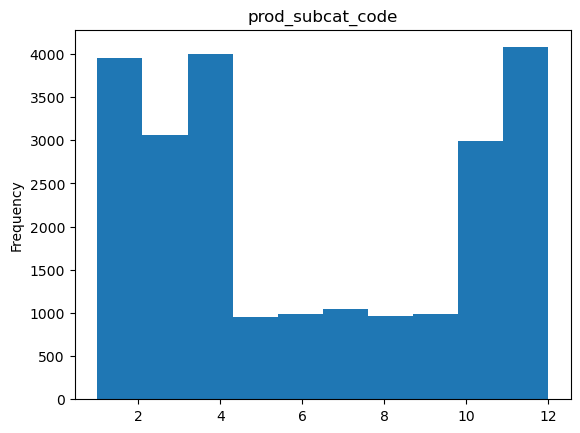

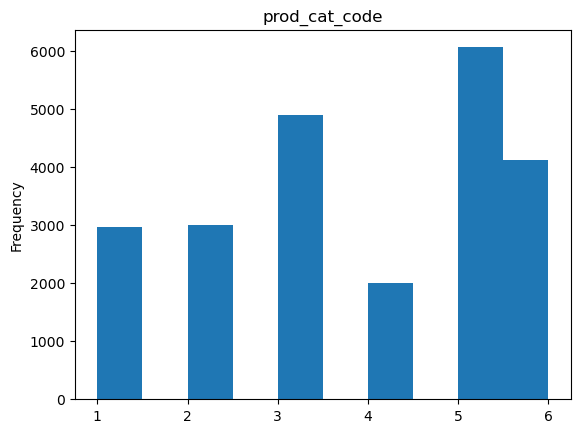

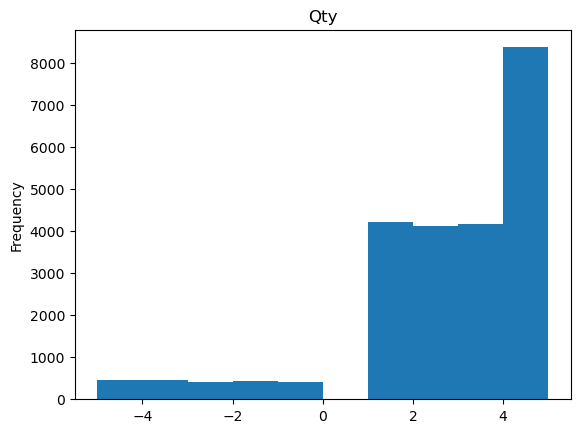

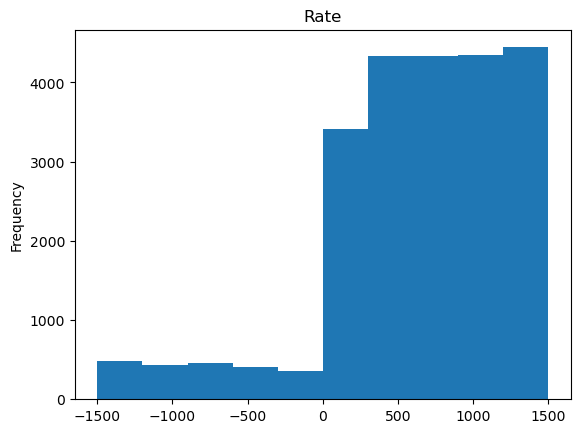

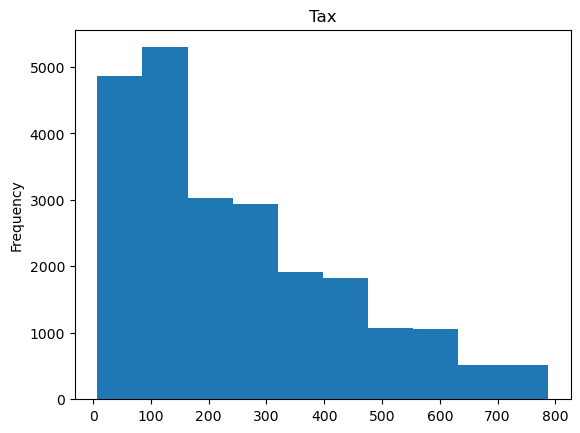

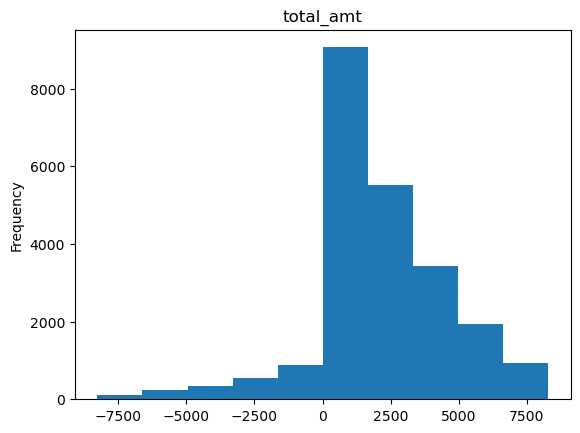

In [101]:
for var in conti_customer.columns:
    conti_customer[var].plot(kind='hist')
    plt.title(var)
    plt.show()

In [39]:
#Bar chart of categorical variables

In [40]:
category_customer = customer_final.loc[:,customer_final.dtypes=='object']

In [41]:
category_customer.head()

,Store_type,prod_cat,prod_subcat,Gender
0,e-Shop,Clothing,Women,M
1,e-Shop,Electronics,Computers,F
2,TeleShop,Books,DIY,M
3,e-Shop,Home and kitchen,Bath,M
4,TeleShop,Books,DIY,M


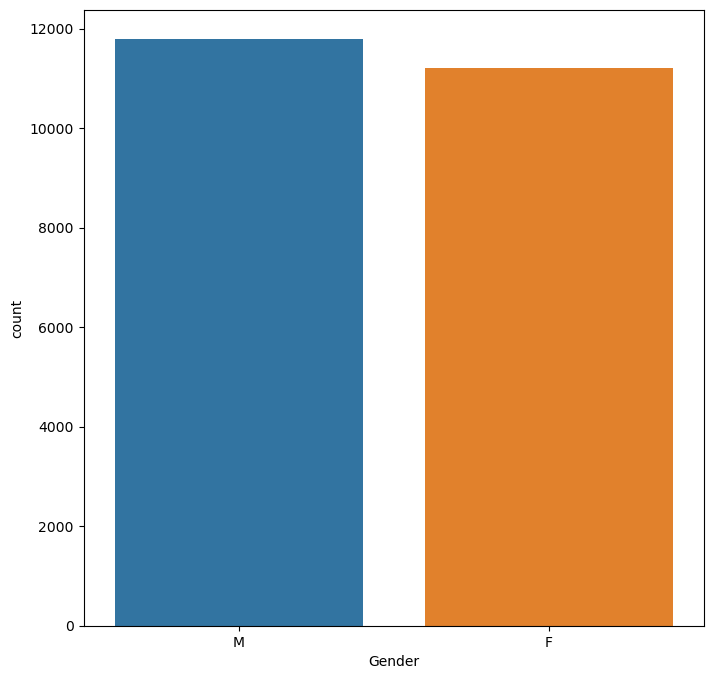

In [42]:
plt.figure(figsize=(8, 8))
sns.countplot(x='Gender', data=category_customer)
plt.show()


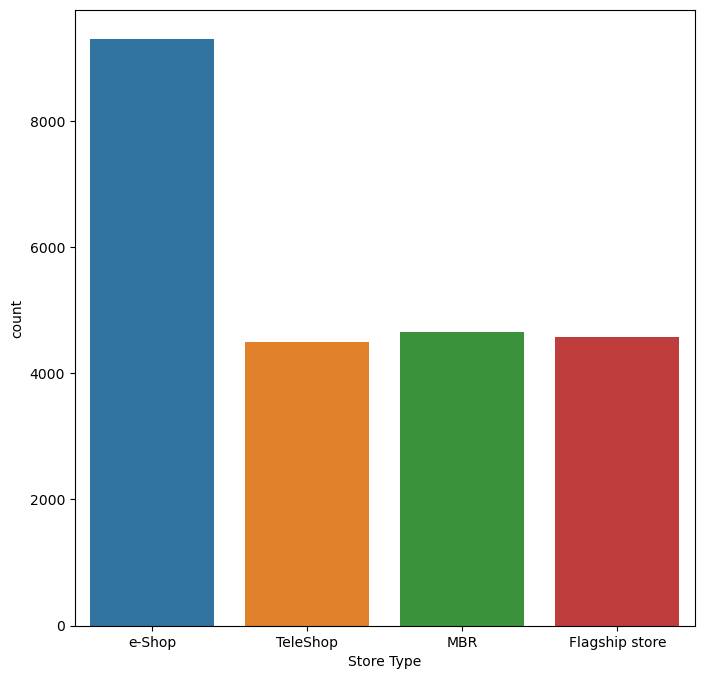

In [43]:
plt.figure(figsize=(8, 8))
sns.countplot(x='Store_type', data=category_customer)
plt.xlabel('Store Type')
plt.show()


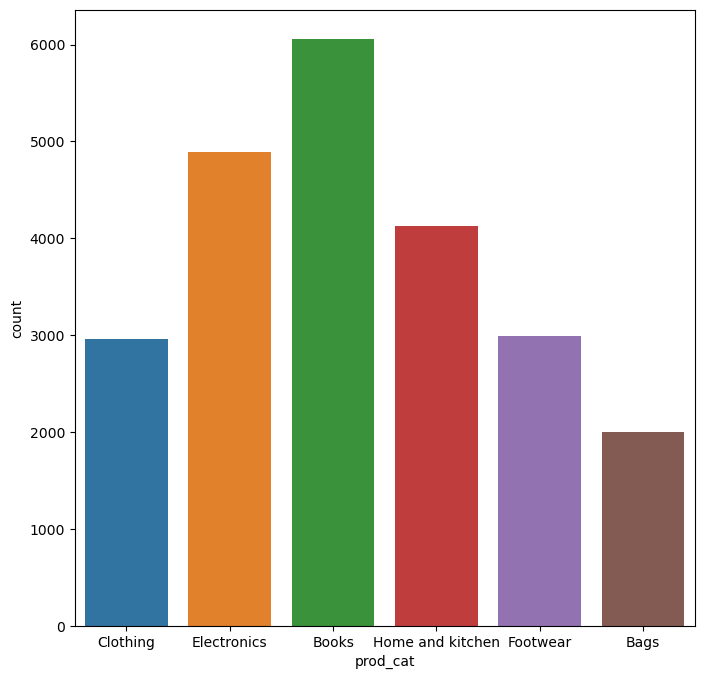

In [44]:
plt.figure(figsize=(8, 8))
sns.countplot(x='prod_cat', data=category_customer)
plt.xlabel('prod_cat')
plt.show()

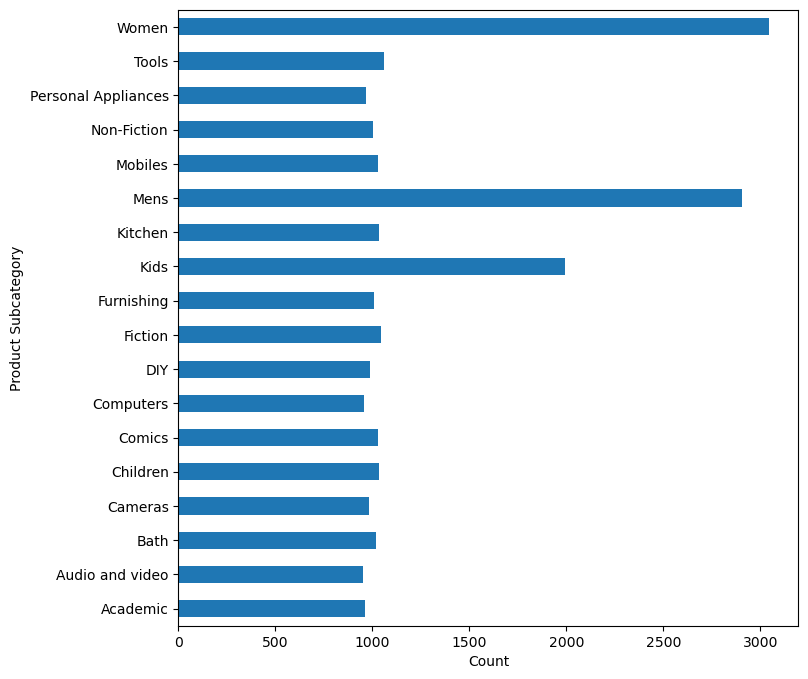

In [45]:
plt.figure(figsize=(8,8))
category_customer.groupby('prod_subcat')['prod_subcat'].count().plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Product Subcategory')
plt.show()




## (4) Calculate the following information using the merged dataset:

#### (a) Time period of the available transaction data

In [46]:
customer_final.sort_values(by="tran_date")

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
23052,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,Books,Children,271961,1982-01-15,M,1.0
23033,32887353269,268885,2011-01-25,3,1,1,276,28.980,304.980,Flagship store,Clothing,Kids,268885,1989-04-14,F,6.0
23034,28972634039,275227,2011-01-25,9,3,1,334,35.070,369.070,MBR,Electronics,Cameras,275227,1989-09-23,M,4.0
23035,42161597232,267094,2011-01-25,3,1,3,147,46.305,487.305,MBR,Clothing,Kids,267094,1992-11-24,M,9.0
23036,46821751538,269160,2011-01-25,10,5,5,941,494.025,5199.025,TeleShop,Books,Non-Fiction,269160,1972-01-24,F,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22907,80348907828,267124,NaT,5,3,2,552,115.920,1219.920,TeleShop,Electronics,Computers,267124,1974-08-21,M,2.0
22908,83849473598,269958,NaT,12,5,3,403,126.945,1335.945,e-Shop,Books,Academic,269958,1992-07-04,M,3.0
22909,95376486237,269403,NaT,4,3,5,673,353.325,3718.325,MBR,Electronics,Mobiles,269403,1986-11-09,M,8.0
22910,81365620177,274222,NaT,3,2,3,373,117.495,1236.495,e-Shop,Footwear,Women,274222,1988-01-21,M,3.0


In [47]:
min_date = customer_final["tran_date"].min()


In [48]:
max_date = customer_final["tran_date"].max()


In [49]:
print("Time period of the available transaction data is from "+ pd.Timestamp.strftime(min_date,format="%d-%m-%Y") + " to " + pd.Timestamp.strftime(max_date,format="%d-%m-%Y"))

Time period of the available transaction data is from 25-01-2011 to 28-02-2014


#### (b) Count of transactions where the total amount of transaction was negative

In [50]:
#count of transaction_ids where total_amt was negative
negative_transaction = customer_final.loc[customer_final["total_amt"] < 0,"transaction_id"].count()
print("Count of transactions where the total amount of transaction was negative is",negative_transaction)

Count of transactions where the total amount of transaction was negative is 2139


## (5) Analyze which product categories are more popular among females vs male customers

In [51]:
#groupby the data set on the basis of "Gender" and "prod_cat"
product_gender = customer_final.groupby(["Gender","prod_cat"])[["Qty"]].sum().reset_index()

In [52]:
product_gender

,Gender,prod_cat,Qty
0,F,Bags,2372
1,F,Books,7090
2,F,Clothing,3431
3,F,Electronics,5837
4,F,Footwear,3730
5,F,Home and kitchen,4902
6,M,Bags,2346
7,M,Books,7599
8,M,Clothing,3752
9,M,Electronics,6490


In [53]:
#converting to pivot table for better view
#Popular products among Male and Female
product_gender.pivot(index="Gender",columns="prod_cat",values="Qty")

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,2372,7090,3431,5837,3730,4902
M,2346,7599,3752,6490,3566,5055


## (6) Which City code has the maximum customers and what was the percentage of customers from that city?

In [54]:
customer_group = customer_final.groupby('city_code')['customer_Id'].count().sort_values(ascending =False)
customer_group

city_code
4.0     2420
3.0     2409
5.0     2354
7.0     2353
10.0    2332
8.0     2325
2.0     2267
1.0     2251
9.0     2169
6.0     2127
Name: customer_Id, dtype: int64

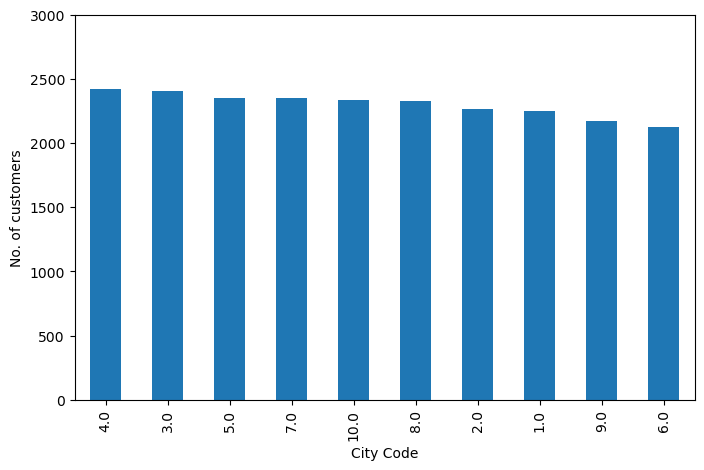

In [55]:
plt.figure(figsize=(8,5))
customer_group.plot(kind="bar")
plt.xlabel("City Code")
plt.ylabel("No. of customers")
plt.yticks(np.arange(0, 3500, step=500))
plt.show()

In [56]:
percentage = round((customer_group[4.0] / customer_group.sum()) * 100,2)
percentage

10.52

In [57]:
print("City code 4.0 has the maximum customers and the percentage of customers from that city is ",percentage)

City code 4.0 has the maximum customers and the percentage of customers from that city is  10.52


## (7) Which store type sells the maximum products by value and by quantity?

In [58]:
customer_final.groupby("Store_type")[["Qty", "Rate"]].sum().sort_values(by="Qty", ascending=False)


,Qty,Rate
Store_type,,
e-Shop,22817,5952183
MBR,11210,2958925
Flagship store,11163,2948708
TeleShop,11001,2839917


## (8) What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [59]:
store_group = round(customer_final.pivot_table(index = "prod_cat",columns="Store_type", values="total_amt", aggfunc='sum'),2)
store_group

Store_type,Flagship store,MBR,TeleShop,e-Shop
prod_cat,,,,
Bags,871026.20,848678.68,789181.06,1621173.12
Books,2498345.33,2505886.96,2547250.42,5303262.96
Clothing,1195816.64,1287686.34,1241834.36,2534373.86
Electronics,2225078.83,2107969.83,1978457.20,4429941.68
Footwear,1234806.56,1121516.44,1241306.17,2644377.71
Home and kitchen,1713004.15,1822403.57,1582421.88,3331788.26


In [60]:
store_group.loc[["Clothing","Electronics"],"Flagship store"]

prod_cat
Clothing       1195816.64
Electronics    2225078.83
Name: Flagship store, dtype: float64

In [61]:
# if we have to find total amount of both 'Clothing' and 'Electronics' from ' Flagship Store'
store_group.loc[["Clothing","Electronics"],"Flagship store"].sum()

3420895.4699999997

## (9) What was the total amount earned from "Male" customers under the "Electronics" category?

In [62]:
gender_group = round(customer_final.pivot_table(index = "prod_cat",columns="Gender", values="total_amt", aggfunc='sum'),2)
gender_group

Gender,F,M
prod_cat,,
Bags,2083336.06,2046722.99
Books,6188659.68,6654056.96
Clothing,3034475.86,3224928.14
Electronics,5025554.36,5715893.17
Footwear,3213670.40,3025787.24
Home and kitchen,4135540.96,4308336.43


In [63]:
male_earning = gender_group.loc["Electronics","M"]
print("The total amount earned from Male customers under the Electronics category is",male_earning)

The total amount earned from Male customers under the Electronics category is 5715893.17


## (10) How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [64]:
#creating a new dataframe that does not contain transactions with negative values
pos_trans = customer_final.loc[customer_final["total_amt"]>0,:]
pos_trans

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
10,29258453508,270384,2014-02-20,5,3,5,1497,785.925,8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0
11,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,Home and kitchen,Tools,267750,1986-10-13,M,1.0
12,1571002198,275023,2014-02-20,6,5,4,587,246.540,2594.540,e-Shop,Books,DIY,275023,1971-03-09,M,6.0
14,36554696014,269345,2014-02-20,3,5,3,1253,394.695,4153.695,e-Shop,Books,Comics,269345,1970-06-26,F,10.0
15,56814940239,268799,2014-02-20,7,5,5,368,193.200,2033.200,e-Shop,Books,Fiction,268799,1979-06-27,M,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,1970-05-22,M,2.0


In [65]:
# creating a dataframe that contains unique transactions 
unique_trans = pos_trans.groupby(['customer_Id','prod_cat','prod_subcat'])['transaction_id'].count().reset_index()
unique_trans

,customer_Id,prod_cat,prod_subcat,transaction_id
0,266783,Books,Non-Fiction,1
1,266783,Clothing,Mens,2
2,266783,Footwear,Mens,1
3,266784,Books,Fiction,1
4,266784,Books,Non-Fiction,1
...,...,...,...,...
19273,275264,Books,Non-Fiction,1
19274,275264,Home and kitchen,Tools,1
19275,275265,Bags,Mens,1
19276,275265,Books,Academic,1


In [66]:
# now finding the customers which have unique transactions greater than 10
unique_trans_count = unique_trans.groupby('customer_Id')['transaction_id'].count().reset_index()
unique_trans_count.head()

,customer_Id,transaction_id
0,266783,3
1,266784,3
2,266785,5
3,266788,4
4,266794,8


In [67]:
unique_trans_count[unique_trans_count['transaction_id'] > 10]

,customer_Id,transaction_id


In [68]:
print('There are no unique transactions greater than 10')

There are no unique transactions greater than 10


## (11) For all customers aged between 25-35, find out:

#### (a) What was the total amount spent for 'Electronics' and 'Books' product categories?

In [69]:
# Calculate age
now = pd.to_datetime('now')
customer_final['AGE'] = ((now - customer_final['DOB']).dt.days // 365.25).astype(int)

customer_final


,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,AGE
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0,42
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0,50
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,31
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0,42
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,1972-02-21,M,7.0,52
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,1984-04-27,M,9.0,39
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,1976-06-20,M,8.0,47
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,1970-05-22,M,2.0,53


In [70]:
#as we have to deal with customers aged between 25-35, so creating new column 'Age_cat'
customer_final['Age_cat'] = pd.cut(customer_final['AGE'],bins=[24,35,46,57],labels=['25-35','36-46','47-57'],include_lowest=True)
customer_final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,AGE,Age_cat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0,42,36-46
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0,50,47-57
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,31,25-35
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0,42,36-46
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,31,25-35


In [71]:
# grouping the dataframe 'customer_final' on the basis of 'Age_cat' and 'prod_cat'
customer_25_35 = customer_final.groupby(['Age_cat','prod_cat'])['total_amt'].sum()
customer_25_35

Age_cat  prod_cat        
25-35    Bags                 811807.035
         Books               2526083.040
         Clothing            1400441.640
         Electronics         2191379.645
         Footwear            1356106.830
         Home and kitchen    1767775.685
36-46    Bags                1936923.560
         Books               6148885.210
         Clothing            3081356.590
         Electronics         5175866.410
         Footwear            3025989.460
         Home and kitchen    4090118.825
47-57    Bags                1381328.455
         Books               4179777.420
         Clothing            1777912.955
         Electronics         3374201.480
         Footwear            1859910.585
         Home and kitchen    2591723.355
Name: total_amt, dtype: float64

In [72]:
customer_25_35.loc['25-35',['Books','Electronics']]

Age_cat  prod_cat   
25-35    Books          2526083.040
         Electronics    2191379.645
Name: total_amt, dtype: float64

In [73]:
print("Total amount spent on 'Electronics' and 'Books' product categories is", 
      customer_25_35.loc['25-35',['Books','Electronics']].sum().round(2))

Total amount spent on 'Electronics' and 'Books' product categories is 4717462.69


#### (b) What was the total amount spent by these customers between 1st Jan 2014 to 1st Mar 2014?

In [74]:
# filtering out data that belongs to the 'age_cat' = 25-35
customer_total_amount_25_35 = customer_final[customer_final['Age_cat']=='25-35']
customer_total_amount_25_35.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,AGE,Age_cat
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,31,25-35
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,31,25-35
23,91116291703,268509,2014-02-20,1,2,4,1243,522.060,5494.060,MBR,Footwear,Mens,268509,1989-08-17,M,10.0,34,25-35
28,88853694830,268444,2014-02-20,4,4,-3,-80,25.200,-265.200,MBR,Bags,Women,268444,1992-01-02,F,6.0,32,25-35
37,31384765864,267058,2014-02-19,3,2,1,793,83.265,876.265,e-Shop,Footwear,Women,267058,1992-02-06,F,10.0,32,25-35


In [75]:
# getting all the data with transaction date between 1st Jan 2014 to 1st Mar 2014?
total_amount = customer_total_amount_25_35[(customer_total_amount_25_35['tran_date'] >='2014-01-01') & (customer_total_amount_25_35['tran_date'] <='2014-03-01')]
total_amount

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,AGE,Age_cat
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,31,25-35
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,31,25-35
23,91116291703,268509,2014-02-20,1,2,4,1243,522.060,5494.060,MBR,Footwear,Mens,268509,1989-08-17,M,10.0,34,25-35
28,88853694830,268444,2014-02-20,4,4,-3,-80,25.200,-265.200,MBR,Bags,Women,268444,1992-01-02,F,6.0,32,25-35
37,31384765864,267058,2014-02-19,3,2,1,793,83.265,876.265,e-Shop,Footwear,Women,267058,1992-02-06,F,10.0,32,25-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,44208101926,274725,2014-01-14,4,3,2,282,59.220,623.220,e-Shop,Electronics,Mobiles,274725,1991-11-17,M,8.0,32,25-35
761,42879420828,269637,2014-01-14,10,5,1,778,81.690,859.690,MBR,Books,Non-Fiction,269637,1989-12-10,F,1.0,34,25-35
764,69724469724,271352,2014-01-14,4,4,1,861,90.405,951.405,MBR,Bags,Women,271352,1992-07-18,M,8.0,31,25-35
782,8225949147,267978,2014-01-13,4,1,1,316,33.180,349.180,Flagship store,Clothing,Mens,267978,1992-08-10,M,6.0,31,25-35


In [76]:
print('The total amount spent by customers aged 25-35 between 1st Jan 2014 to 1st Mar 2014 is',
      total_amount['total_amt'].sum())

The total amount spent by customers aged 25-35 between 1st Jan 2014 to 1st Mar 2014 is 294362.05500000005
